In [ ]:
#Import libraries need for data manipulation and visualization

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Import Weather Data

For the unsupervised tasks we will be working with and exploring the weather data.  In order to view some more details about the weather data we will add a season column.

In [ ]:
#add in weather data
weather = pd.read_csv('weather.csv').rename(columns = {'dayl (s)':'dayl', 
                                   'prcp (mm/day)': 'prcp',
                                    'srad (W/m^2)': 'srad',
                                    'swe (kg/m^2)': 'swe',
                                    'tmax (deg c)': 'tmax',
                                    'tmin (deg c)': 'tmin',
                                    'vp (Pa)': 'vp'})

#select only variables needed, we will not be working with the 30-day rolling mean
df = weather[['Site_ID', 'DOY', 'dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']]
df

,Site_ID,DOY,dayl,prcp,srad,swe,tmax,tmin,vp
0,1007,1,33193.96,0.00,275.35,7.77,7.51,-6.34,380.31
1,1007,2,33235.12,0.00,196.61,6.32,4.71,-2.56,505.90
2,1007,3,33279.64,0.00,191.46,4.94,4.28,-2.71,500.52
3,1007,4,33327.50,3.29,119.67,4.76,-0.09,-5.57,403.27
4,1007,5,33378.65,8.51,76.53,3.95,-0.73,-4.06,452.12
...,...,...,...,...,...,...,...,...,...
6165575,9996,361,31458.62,0.00,164.90,12.29,7.35,0.22,620.66
6165576,9996,362,31486.70,0.00,178.98,12.09,2.16,-5.52,405.01
6165577,9996,363,31518.88,0.78,222.72,11.67,8.18,-5.00,421.40
6165578,9996,364,31555.13,0.00,195.00,11.28,4.00,-5.08,418.75


# 2. Principal Component Analysis (PCA)

PCA is used to extract features from the original dataset so that the new extracted features still capture the original variation and structure of the original data but the new features are reduced in dimensionality.  PCA uses a linear transformation of the original data.  The components are so that the greatest amount of variation in the data can be described by the first component and the second component  will capture the most amount of the remaining variance at a right angle to the first component.  With higher dimensions there are more right angles to explore.  We are going to explore the data to see which principal components (PCs) can be found in our weather data and how the features contribute to each component.

In [ ]:
#Using PCA for exploration (so no need to split the data)
features = ['dayl','prcp','srad','swe','tmax','tmin','vp']

## 2.1 Data Scaling and Choosing Number of Components

We need to standardize the features so that all the data is on the same scale.  There are several ways to scale the data and we explore how the scaling affects the amount of variance captured by each component in PCA.

We also need to explore the optimal number of principal components.  There are several ways to do that and we explore using scree plots to plot the proportion each component captures of the total variation. We also plot together the individual and cumulative explained variance ratio for each principal component based on choice of scaler.

In [ ]:
#Data scalers

#Standard Scaler - the mean of each feature will be rescaled to 0 and the variance will be 1.
std = StandardScaler().fit_transform(df[features])

#Robust Scaler - this method of scaling is robust to outliers as it uses the mean and quartiles to scale.
robust = RobustScaler().fit_transform(df[features])

#MinMax Scaler - scales so that all feature values are between 0 and 1. The distribution of the data stays the same.
minmax = MinMaxScaler().fit_transform(df[features])

In [ ]:
#Fit on all features to view all variance
#instantiate and fit pca for std scaler
pca_std = PCA().fit(std)

#instantiate and fit pca for robust
pca_robust = PCA().fit(robust)

#instantiate and fit pca for minmax
pca_minmax = PCA().fit(minmax)

Text(0.5, 0.98, 'Scree Plots Under Different Scalers')

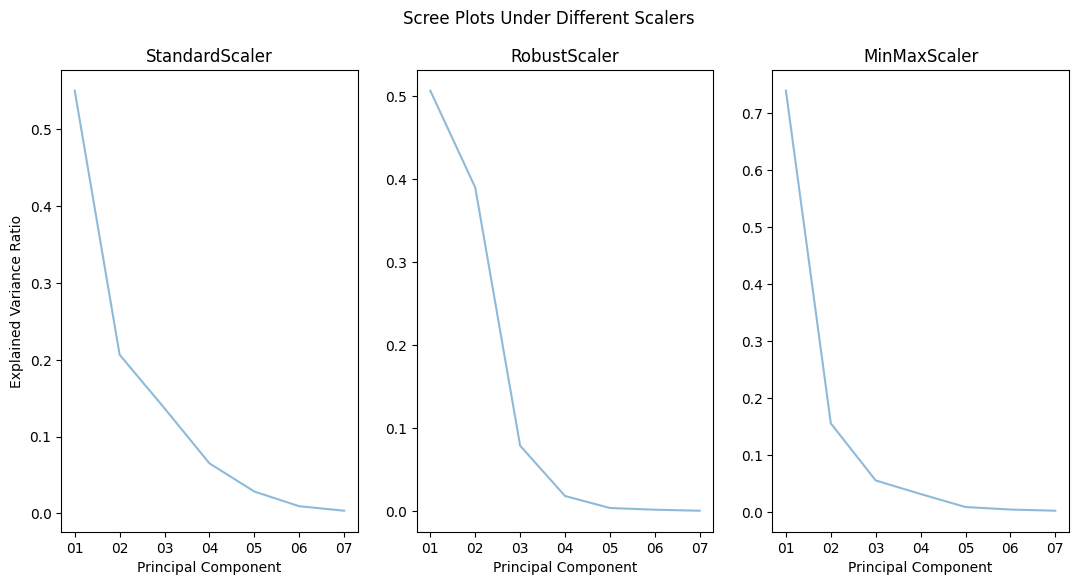

In [ ]:
#collect explained variance ratio for the PCA for each scaler
e_val_std = pca_std.explained_variance_ratio_
e_val_robust = pca_robust.explained_variance_ratio_
e_val_minmax = pca_minmax.explained_variance_ratio_

#labels for each PC
PC = ['01','02','03','04','05','06', '07']

#create a figure to view the scree plots for each scaler
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(13, 6))

ax1.plot(PC, e_val_std, alpha=0.5)
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_xlabel('Principal Component')
ax1.set_title('StandardScaler')


ax2.plot(PC, e_val_robust, alpha=0.5)
ax2.set_xlabel('Principal Component')
ax2.set_title('RobustScaler')


ax3.plot(PC, e_val_minmax, alpha=0.5)
ax3.set_xlabel('Principal Component')
ax3.set_title('MinMaxScaler')

fig.suptitle('Scree Plots Under Different Scalers')

To interpret the scree plot we look to see at which PC there is an "elbow" in the line where a -45 degree line would be tangent.  For the StandardScaler there is a distinct elbow that occurs at the second PC.  For the RobustScaler the elbow looks to be occurring between the third and fourth PC. And MinMax between the second and third. 

We can also view the same data as a bar plot but also include the cumulative explained ratio.

Text(0.5, 0.98, 'PCA Explained Variance Under Different Scalers')

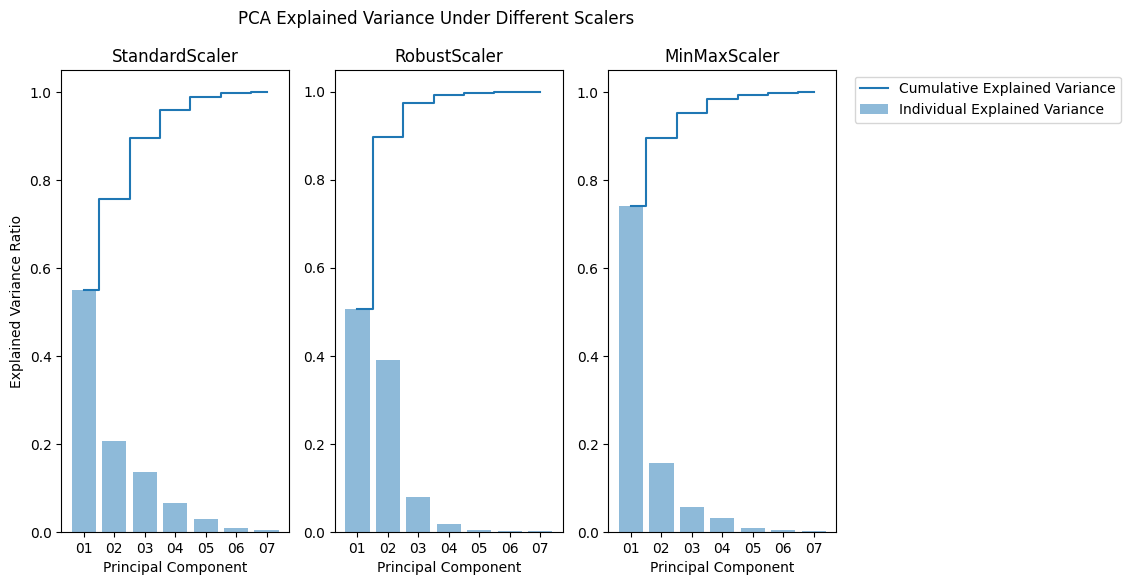

In [ ]:
#from https://vitalflux.com/pca-explained-variance-concept-python-example/

#calculate cumulative sum for each
cum_sum_e = np.cumsum(e_val_std)
cum_sum_e_r = np.cumsum(e_val_robust)
cum_sum_e_m = np.cumsum(e_val_minmax)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 6))
ax1.bar(PC, e_val_std, alpha=0.5, align='center', label='Individual Explained Variance')
ax1.step(PC, cum_sum_e, where='mid',label='Cumulative Explained Variance')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_xlabel('Principal Component')
ax1.set_title('StandardScaler')

ax2.bar(PC, e_val_robust, alpha=0.5, align='center', label='Individual Explained Variance')
ax2.step(PC, cum_sum_e_r, where='mid',label='Cumulative Explained Variance')
ax2.set_xlabel('Principal Component')
ax2.set_title('RobustScaler')

ax3.bar(PC, e_val_minmax, alpha=0.5, align='center', label='Individual Explained Variance')
ax3.step(PC, cum_sum_e_m, where='mid',label='Cumulative Explained Variance')
ax3.set_xlabel('Principal Component')
ax3.set_title('MinMaxScaler')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.suptitle('PCA Explained Variance Under Different Scalers')

All three scalers show that 2 principal components will explain most of the variance (80%) in the dataset. We will use the StandardScaler, which in order to get 80% of the variance uses 3 components. 

## 2.2 Exploring Principal Components

Based on the above we will now explore the top 3 PCs using the StandardScaler to see which features are most important.

In [ ]:
#need to clean the space and delete previously created variables for computing issues
del robust, minmax, pca_robust, pca_minmax, e_val_std, e_val_robust, e_val_minmax

In [ ]:
#Instantiate and fit model for 3 components
pca_std = PCA(n_components = 3).fit(std)

In [ ]:
pca_comp = pd.DataFrame(pca_std.components_, columns=features, index=["1st PC", "2nd PC", "3rd PC"])
pca_comp

,dayl,prcp,srad,swe,tmax,tmin,vp
1st PC,-0.435729,-0.007892,-0.249040,0.230464,-0.492662,-0.482618,-0.468303
2nd PC,-0.223340,0.538537,-0.652106,-0.416206,-0.014418,0.175838,0.174645
3rd PC,0.250909,0.725300,0.114037,0.630411,-0.007374,-0.008807,0.020752


<AxesSubplot: >

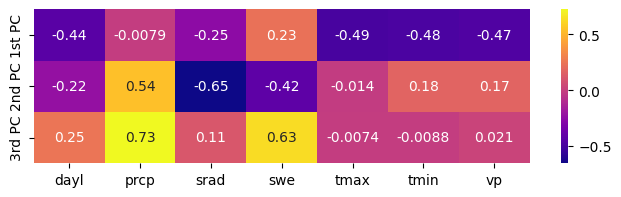

In [ ]:
#heatmap
plt.figure(figsize=(8,2))
sns.heatmap(data=pca_comp, annot=True, cmap = 'plasma')

In [ ]:
https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components
#create biplot setup by finding important features

def find_imp_feat(fitted_pca):
    # number of components
    n_pcs= fitted_pca.components_.shape[0]

    # get the index of the most important feature on EACH component
    most_important = [np.abs(fitted_pca.components_[i]).argmax() for i in range(n_pcs)]

    # get the names
    most_important_names = [features[most_important[i]] for i in range(n_pcs)]
    print(f'''Most important features: {most_important_names}''')

find_imp_feat(pca_std)

Most important features: ['tmax', 'srad', 'prcp']


In [ ]:
#from Assignment 1, SIADS 543
#create function

def biplot(score, coeff, maxdim, pcax, pcay, labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score[:, pca1]
    ys = score[:, pca2]
    n = min(coeff.shape[0], maxdim)
    scalex = 2.0 / (xs.max() - xs.min())
    scaley = 2.0 / (ys.max() - ys.min())
    text_scale_factor = 1.5

    plt.figure(figsize=(10, 9))
    plt.scatter(xs * scalex, ys * scaley, s=1)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2], color="r", alpha=0.5)
        if labels is None:
            plt.text(
                coeff[i, pca1] * text_scale_factor,
                coeff[i, pca2] * text_scale_factor,
                "Var" + str(i + 1),
                color="black",
                ha="center",
                va="center",
            )
        else:
            plt.text(
                coeff[i, pca1] * text_scale_factor,
                coeff[i, pca2],
                labels[i],
                color="black",
                ha="center",
                va="center",
            )
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    plt.tight_layout()
    
    return

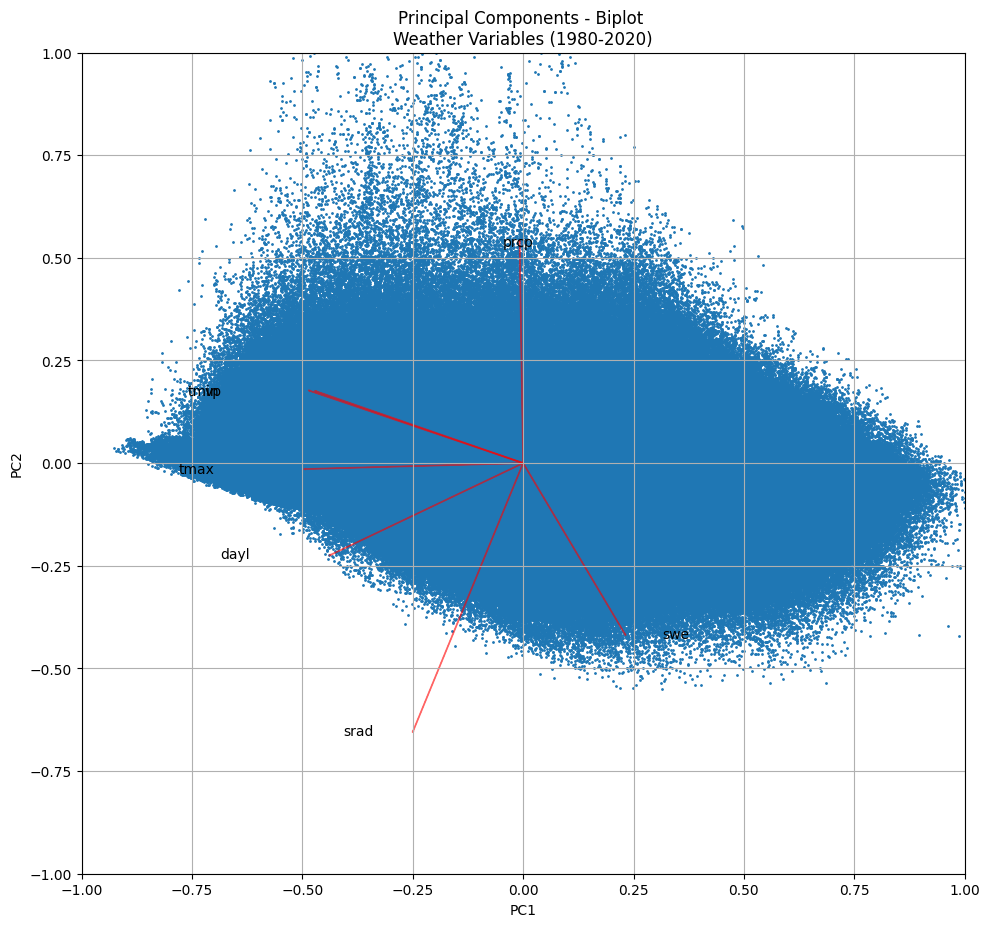

In [ ]:
#transform the data
X_pca = pca_std.transform(std)

biplot(X_pca, np.transpose(pca_std.components_[0:2, :]), len(features), 1, 2, labels=features)
plt.title("Principal Components - Biplot \nWeather Variables (1980-2020)")
plt.show()


## 2.3 Sparse PCA

In [ ]:
from sklearn.decomposition import SparsePCA
#increase alpha to force sparser components
#max_iter - more iterations would be better, but lowering here for time
#n_jobs - using all processors (when set to -1)
pca_sparse = SparsePCA(n_components=3, alpha = 30, max_iter = 100, n_jobs = -1, random_state=4)
pca_sparse.fit(std)
X_transformed = pca_sparse.transform(std)

sparse_comp = pd.DataFrame(pca_sparse.components_, columns=features, index=["1st PC", "2nd PC", "3rd PC"])

<AxesSubplot: >

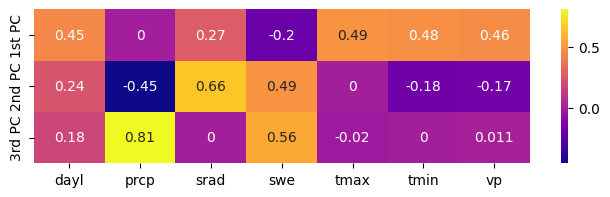

In [ ]:
plt.figure(figsize=(8,2))
sns.heatmap(data=sparse_comp, annot=True, cmap = 'plasma')

Sparse PCA does not make sense in this scenario as the components close to zero that are already contributing to the first component are what get fit to zero first.  Increasing alpha will just continue to push the others close to zero which we can visually see where that would occur. This would work better where there are many more features, which is where Sparse PCA is best used.

In [ ]:
del pca_sparse, X_transformed, sparse_comp

## 2.4 Seasonal PCA

Instead of scaling the data over the whole year, it would be interesting to see how the principal components are created when scaled for the seasons.  

In [ ]:
#Create a season column in the dataframe

def get_season(doy):
    if doy < 60:
    #months Jan, Feb
        return 'winter'
    #months Mar, Apr, May
    elif doy >= 60 and doy < 152:
        return 'spring'
    #months June, July, August
    elif doy >=152 and doy < 274:
        return 'summer'
    #months September, October, November
    elif doy >=274 and doy<= 334:
        return 'fall'
    #month of Dec
    elif doy >= 335:
        return 'winter'

df['season'] = df['DOY'].apply(get_season)
df.sample(n=5)

/tmp/ipykernel_47/1502673952.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['DOY'].apply(get_season)


,Site_ID,DOY,dayl,prcp,srad,swe,tmax,tmin,vp,season
2437803,14820,334,32137.39,16.18,141.58,16.18,2.74,-6.12,386.69,fall
819378,14653,319,33569.43,2.03,145.17,0.00,10.10,0.85,649.64,fall
5013316,38569,42,36913.39,0.00,326.20,0.00,2.88,-9.62,294.54,winter
963625,14681,26,34176.68,0.00,284.84,44.47,1.25,-12.99,224.85,winter
5717777,6504,53,37809.59,0.00,253.65,255.37,0.91,-6.58,373.51,winter


In [ ]:
for season in df['season'].unique():
    #subset by season
    s_df = df[df['season']==season]
    #scale the data
    std_s = StandardScaler().fit_transform(s_df[features])
    #PCA
    #instantiate and fit pca model
    pca_s = PCA(n_components = 3).fit(std_s)

    print(season)
    find_imp_feat(pca_s)


winter
Most important features: ['tmin', 'dayl', 'prcp']
spring
Most important features: ['tmin', 'srad', 'swe']
summer
Most important features: ['tmin', 'srad', 'swe']
fall
Most important features: ['tmax', 'srad', 'swe']


Some interesting results. According to the most important features, we still have temperature being important, however it varies as to whether maximum or minimum plays the larger role.  The daylength and amount of solar radiation still play an important role. Snow water equivalent is important in the summer and fall maybe because the values always are zero in summer and fall.

# 3. K-Means

In [ ]:
#need to clean the space and delete previously created variables for computing issues
del pca_std, pca_comp, del X_pca, del std_s, s_df, pca_s

In [ ]:
#will use same standard scaler as above
std = StandardScaler().fit_transform(df[features])

K-means needs the user to define the number of clusters to find.  Need to find optimal number of clusters for k-means to assign each weather day. Several scoring metrics were used such as the Davies-Bouldin Score, the Calinksi-Harabasz Score, and viewing the sum of squared differences for a number of cluster attempts.

## 3.1 Scoring Metrics

In [ ]:
#from Assignment 1, SIADS 543
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
#We're looking for clusterings that have a high Calinski-Harabasz score, but a low Davies-Bouldin score.

cluster = []
calinski = []
davies = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=4).fit(std)
    labels = kmeans.labels_
    
    cluster.append(k)
    calinski.append(metrics.calinski_harabasz_score(std, labels))
    davies.append(davies_bouldin_score(std, labels))

In [ ]:
cluster_scores = pd.DataFrame({'num_cluster': cluster, 'calinski': calinski, 'davies': davies})
cluster_scores

,num_cluster,calinski,davies
0,2,4.433263e+06,1.043572
1,3,3.422635e+06,1.118493
2,4,3.150441e+06,1.082578
3,5,3.055872e+06,1.103190
4,6,2.932661e+06,1.148543
5,7,2.741461e+06,1.155571
6,8,2.592369e+06,1.186342
7,9,2.476285e+06,1.216821


Text(0.5, 0.98, 'Scoring to Determine Optimal Number of Clusters \n Looking for clusters that have a low Davies-Bouldin score but a high Calinski-Harabasz score')

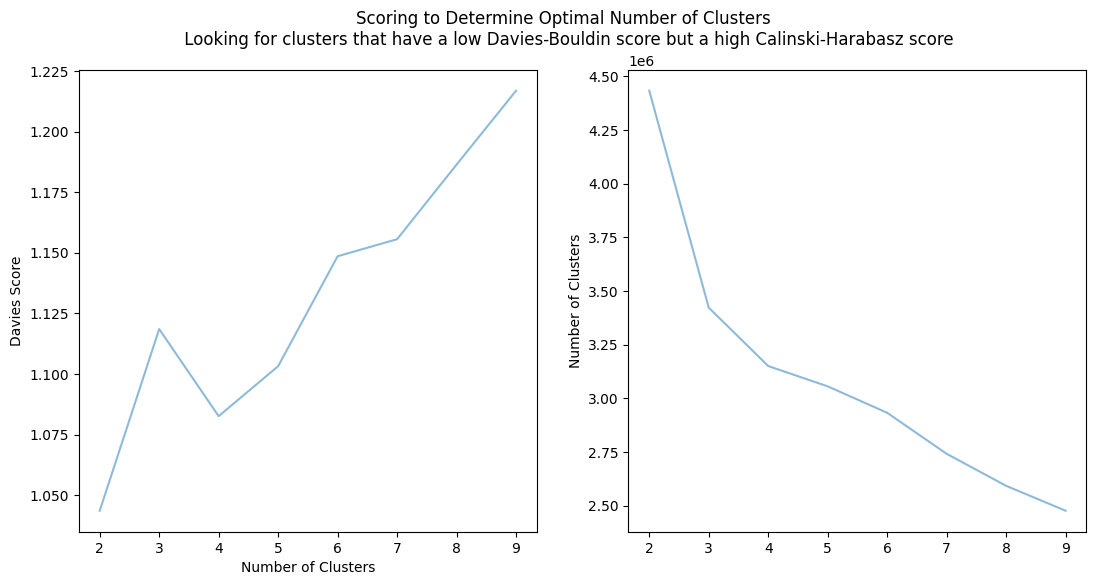

In [ ]:
#create a figure to view each score for each number of clusters
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(13, 6))

ax1.plot(cluster_scores['num_cluster'], cluster_scores['davies'], alpha=0.5)
ax1.set_ylabel('Davies Score')
ax1.set_xlabel('Number of Clusters')

ax2.plot(cluster_scores['num_cluster'], cluster_scores['calinski'], alpha=0.5)
ax2.set_ylabel('Calinski Score')
ax2.set_ylabel('Number of Clusters')

fig.suptitle('Scoring to Determine Optimal Number of Clusters \n Looking for clusters that have a low Davies-Bouldin score but a high Calinski-Harabasz score')

In the above chart we are looking to see which number of clusters gives us a low Davies-Bouldin score and a high Calinksi-Harabasz score.  It appears that from these two metrics 2 clusters would be ideal, however we want to explore more weather typology then either hot or cold days or rainy or dry days.  The next best number of clusters, according to the metrics, is 4 clusters.

## 3.2 Sum of Squared Distances Metric

Another metric to understand the best number of clusters to use for K-Means clustering is the Sum of Squared Distances plotted and looking for where an "elbow" appears in the chart.  Between each point in a cluster and the center of that cluster, the sum of the squared distance between them is calculated.  The point in the chart where an elbow appears and the sum of squared distances begins to level out is where the ideal number of clusters occurs.

In [ ]:
#Elbow Plot to Determine best number of clusters
#https://github.com/y656/Weather-data-clustering/blob/main/code%20file%20.ipynb

sum_of_squared_distances = []
K = range(2,10)
for k in K:
    k_means = KMeans(n_clusters=k,init = 'k-means++',n_init = 1)
    model = k_means.fit(std)
    sum_of_squared_distances.append(k_means.inertia_)

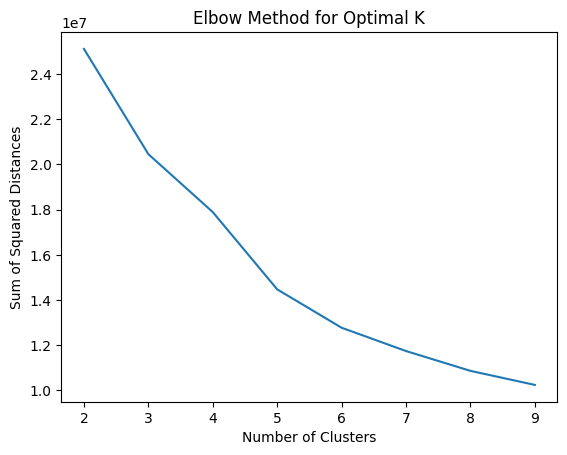

In [ ]:
plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

The above chart does not have a well defined elbow. Perhaps one occurs around 3 or 5 clusters?  There is no definite point at which the sum of squared distances begins to level out. The previous scores (Calinski and Davies) provide better guidance.

## 3.3 Exploring K-Means Clusters

4 clusters appears to be the optimal number based on the metrics used above.  The initialization method will be k-means++ to help speed up the convergence. This means the initial cluster centers are set based on the probability distribution of the centroids’ contribution to the overall inertia.  The number of runs the k-means algorithm tries before determining the best output is set to 1, because of computing space in Deepnote and the size of our data.  The maximum number of iterations for the algorithm to iterate through a single run was set to 100, also because of size and space constraints. 

In [ ]:
optimal_k = 4 #appears to be optimal; 2 is too few and 4 is the best of the rest

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=100, n_init=1, random_state=4).fit(std)

We want to see what kind of weather days the K-means clustering produces.  To do that we will plot the cluster centers.

In [ ]:
#https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
#function that creates a dataframe with a column for cluster number
centers = kmeans.cluster_centers_
def pd_centers(cols_of_interest, centers):
    random_state=4
    colNames = list(cols_of_interest)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P
P = pd_centers(('dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp'), centers)
P #these are the transformed values

,dayl,prcp,srad,swe,tmax,tmin,vp,prediction
0,-0.192215,-0.138879,0.560054,2.290335,-0.870723,-1.042315,-0.899926,0
1,-0.957096,-0.171956,-0.720202,-0.171025,-0.785994,-0.699273,-0.721306,1
2,0.840712,-0.232638,0.590153,-0.423119,0.873124,0.800917,0.788078,2
3,0.200529,2.911790,-0.860729,-0.272961,0.211215,0.516269,0.473303,3


In [ ]:
Pcenters = pd.melt(P, id_vars = ['prediction'], var_name = 'var', value_name = 'val')
Pcenters['prediction'] = Pcenters['prediction'].astype(str)
fig = px.scatter(Pcenters, x='val', y='prediction', color='var', 
            labels=dict(val='Value', var='Features', prediction='Predicted Cluster'),
                title='K-Means Clustering of Daily Weather Typologies')
fig.update_layout(plot_bgcolor='white', autosize=False, width=900, height=500, title={'x':0.5, 'xanchor':'center', 'y':0.875})
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    zerolinecolor='black', zerolinewidth=0.25,
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    zerolinecolor='black',
    gridcolor='lightgrey'
)
fig.update_traces(marker=dict(size=12))

The above chart shows that there are 4 weather typologies that are most prominent in the data.  The easiest way to interpret is to look at where the amount of daylight falls within the chart.  Since daylight is correlated with seasons, we have an initial starting point to see that all 4 season were captured.  This is confirmed when looking at temperatures.  The 4 weather typologies appear to be a hot day, a cold day, a very cold day with lots of snow on the ground, and day with lots of rain.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bbd9398-18f2-46ef-ba4f-be9bc7f4116a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>